In [49]:
# Import libraries
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Read The iris dataset
df=pd.read_csv('iris.csv')

In [51]:
# See the head of the iris dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
# See the bottom of the dataset
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [53]:
# Information about the iris dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
# Describe about the iris dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
# Find the correlation
df.corr()

<ipython-input-55-459f77f28e30>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [56]:
# Find the null values present or not
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [57]:
# count different species
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

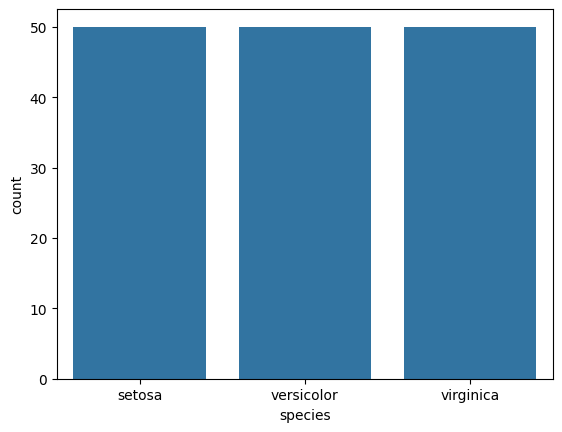

In [58]:
# # Visual representation of the species
sns.countplot(x='species',data=df)
plt.show()

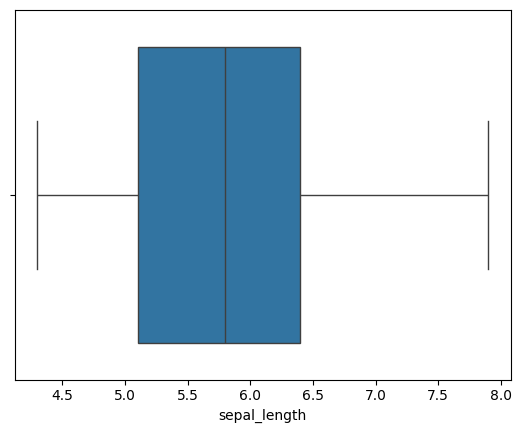

In [59]:
# Box plot for sepal length species
sns.boxplot(x='sepal_length',data=df)
plt.show()

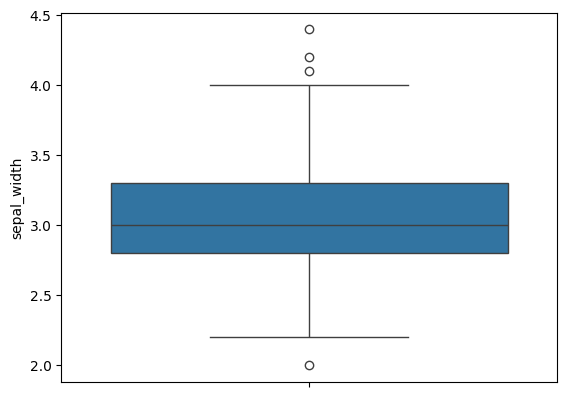

In [60]:
sns.boxplot(y='sepal_width',data=df)
plt.show()

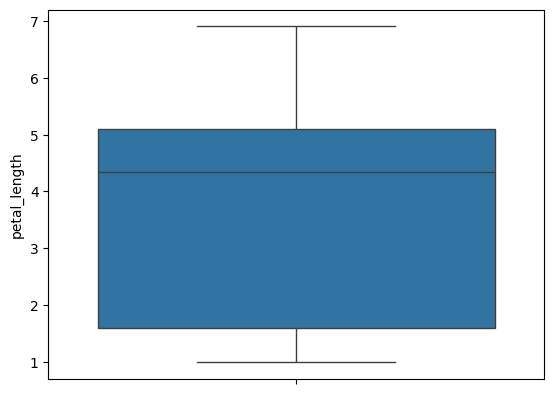

In [61]:
sns.boxplot(y='petal_length',data=df)
plt.show()

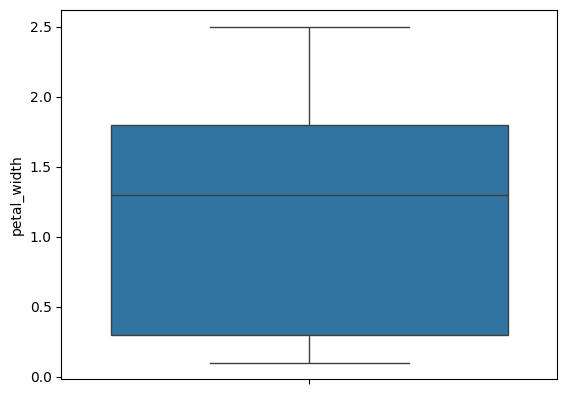

In [62]:
sns.boxplot(y='petal_width',data=df)
plt.show()

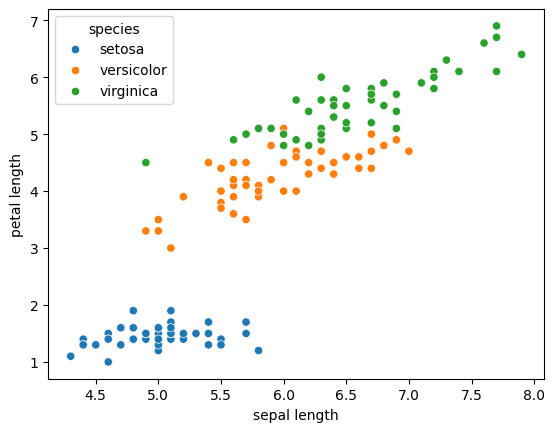

In [63]:
sns.scatterplot(x='sepal_length',y='petal_length',hue='species',data=df)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.show()

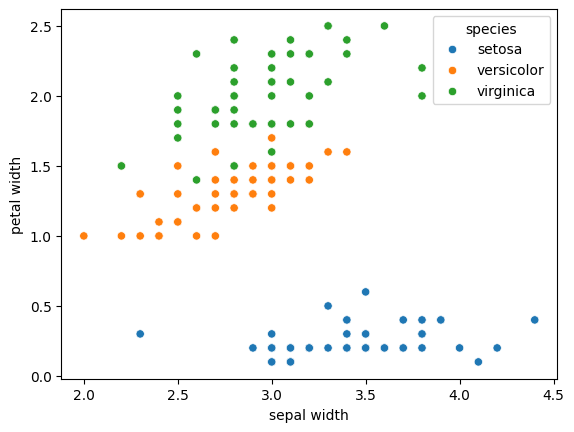

In [64]:
sns.scatterplot(x='sepal_width',y='petal_width',hue='species',data=df)
plt.xlabel('sepal width')
plt.ylabel("petal width")
plt.show()

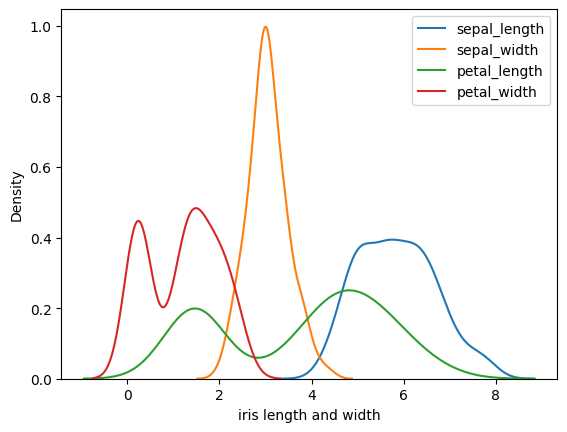

In [65]:
sns.kdeplot(x='sepal_length',data=df)
sns.kdeplot(x='sepal_width',data=df)
sns.kdeplot(x='petal_length',data=df)
sns.kdeplot(x='petal_width',data=df)
plt.xlabel('iris length and width')
plt.legend(['sepal_length','sepal_width','petal_length','petal_width'])
plt.show()

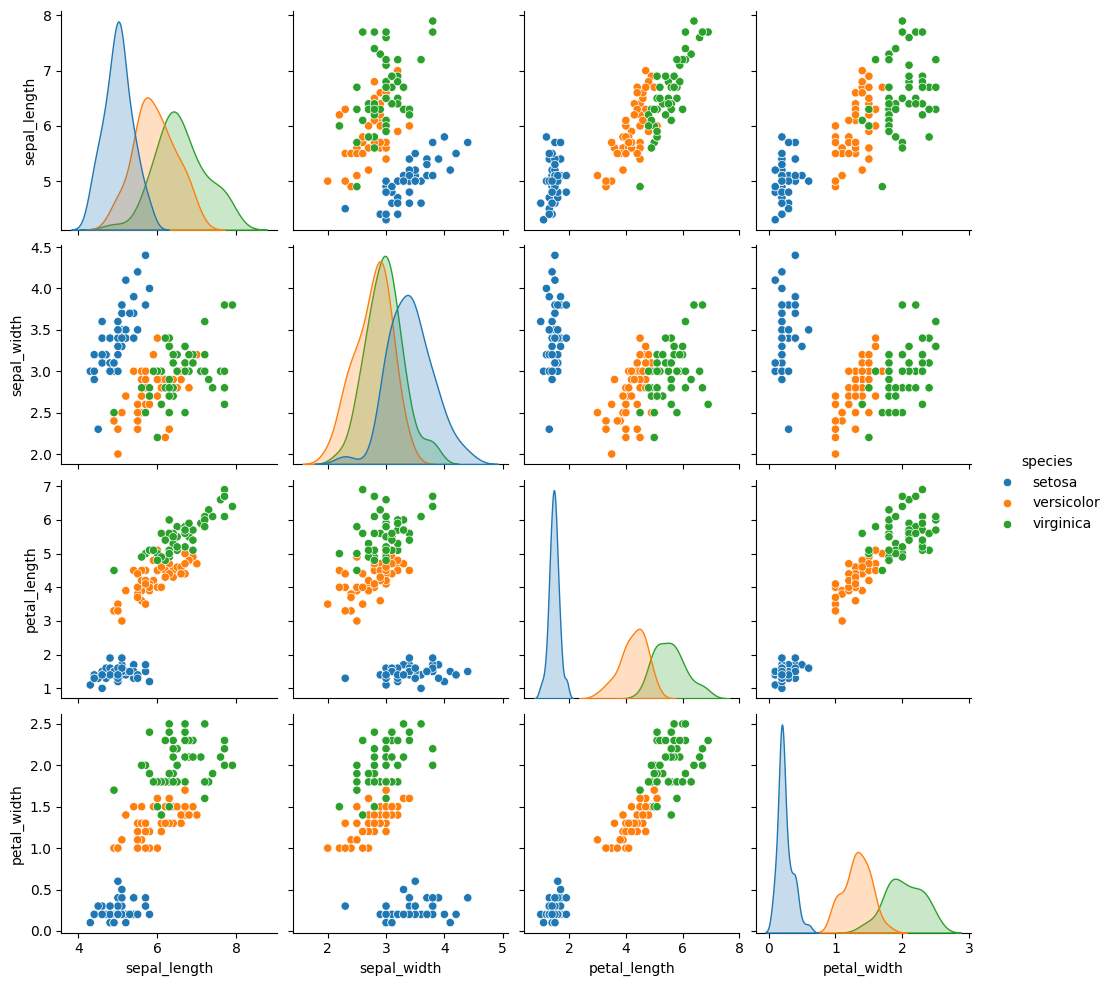

In [66]:
sns.pairplot(df,hue='species')
plt.show()

<ipython-input-67-5373ce618140>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


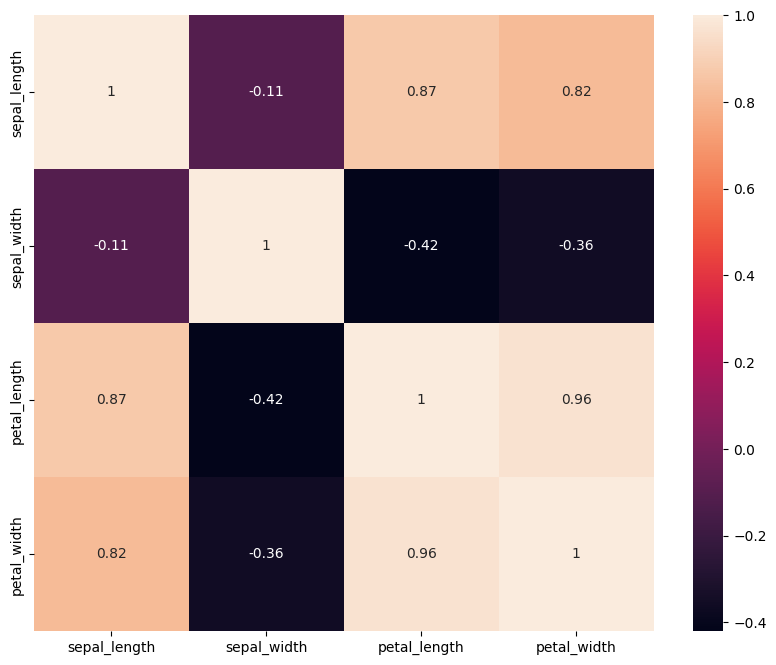

In [67]:
# Heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [68]:
# import label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df['species'])
df['species']=le.transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [69]:
# Splitting into x and y
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.shape,y.shape)

(150, 4) (150,)


In [70]:
# Split for training and dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(105, 4) (45, 4) (105,) (45,)


In [71]:
from sklearn.tree import DecisionTreeClassifier
DTmodel=DecisionTreeClassifier(criterion='entropy',random_state=1)
#training the data
DTmodel.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [72]:
#testing the data
accuracy=DTmodel.score(xtest,ytest)
# Finding Accuracy
print("Accuracy",accuracy*100)

Accuracy 95.55555555555556


In [73]:
# Predicting testing data
ypred=DTmodel.predict(xtest)
ypred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [74]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,ytest)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

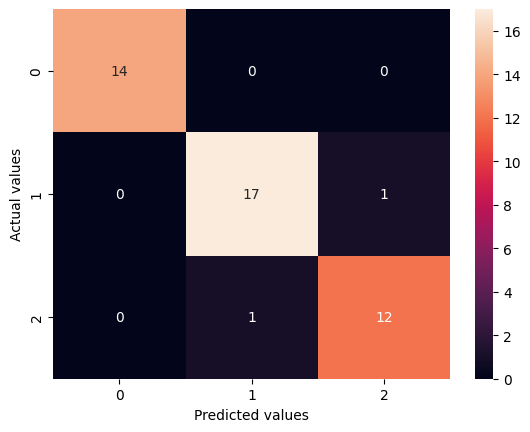

In [75]:
# Heat map for analyze accuracy
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()